In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform as pf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from matplotlib import font_manager, rc
path = 'c:/Windows/Fonts/malgun.ttf'
if pf.system() == 'Darwin':
    rc('font', family='Arial Unicode MS')
    print('Plt Korean setting is done in your Mac')
elif pf.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Plt Korean setting is done in your Windows')
else:
    print('Unknown System, Sorry~')
    
plt.rcParams['axes.unicode_minus']=False

Plt Korean setting is done in your Windows


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

db_host = os.getenv("DB_HOST")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_endpoint = os.getenv("DB_ENDPOINT")

In [3]:
import mysql.connector

local = mysql.connector.connect(
    host = db_host,
    user = db_user,
    password = db_password,
    database = 'commerce')

cur = local.cursor(buffered=True)

In [4]:
sql_query = '''
SELECT s.CustomerID, Gender, SubscriptionPeriod, TransactionID, TransactionDate, ProductID, ProductCategory, Quantity, AverageAmount, CouponStatus, (Quantity * AverageAmount) as Sales, MID(TransactionDate, 6, 2) Month
FROM sales s, customer c
WHERE s.CustomerID = c.CustomerID
'''
cur.execute(sql_query)
tmp_result = cur.fetchall()
col = [i[0] for i in cur.description]
sales_df = pd.DataFrame(tmp_result, columns = col)
sales_df

,CustomerID,Gender,SubscriptionPeriod,TransactionID,TransactionDate,ProductID,ProductCategory,Quantity,AverageAmount,CouponStatus,Sales,Month
0,USER_1358,남,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,Used,153.71,01
1,USER_1358,남,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,Used,153.71,01
2,USER_1358,남,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,Used,2.05,01
3,USER_1358,남,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,Not Used,87.65,01
4,USER_1358,남,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,Used,16.50,01
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_1144,남,47,Transaction_9999,2019-06-07,Product_0224,Apparel,1,15.99,Clicked,15.99,06
52920,USER_1144,남,47,Transaction_9999,2019-06-07,Product_0337,Apparel,1,59.99,Clicked,59.99,06
52921,USER_1144,남,47,Transaction_9999,2019-06-07,Product_0418,Apparel,1,15.19,Used,15.19,06
52922,USER_1144,남,47,Transaction_9999,2019-06-07,Product_0634,Apparel,1,67.19,Used,67.19,06


In [5]:
sales_per_customer = sales_df.pivot_table(index='CustomerID', columns='Month', values='Sales', aggfunc=np.sum, margins=True, margins_name='Total sales')
sales_per_customer.fillna(0, inplace=True)
sales_per_customer

Month,01,02,03,04,05,06,07,08,09,10,11,12,Total sales
CustomerID,,,,,,,,,,,,,
USER_0000,0,0,0,0,0,0,0,0,30.99,0,0,0,30.99
USER_0001,0,0,11216.05,0,0,0,0,0,0,0,2618.85,0,13834.90
USER_0002,0,0,0,0,0,777.03,0,0,0,665.09,0,0,1442.12
USER_0003,0,0,0,0,0,0,0,0,0,0,0,1360.07,1360.07
USER_0004,0,0,0,0,0,0,0,0,1442.47,0,0,0,1442.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
USER_1464,0,0,0,0,0,1249.10,0,864.44,0,249.51,0,0,2363.05
USER_1465,0,0,0,86.87,0,14.69,0,0,0,0,0,0,101.56
USER_1466,0,0,0,0,0,0,0,0,0,298.00,0,0,298.00


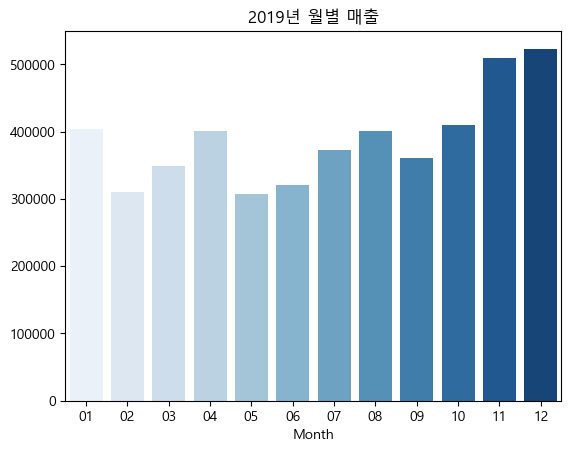

In [6]:
sns.barplot(data=sales_per_customer.iloc[-1:, :-1], palette='Blues')
plt.title('2019년 월별 매출');

---

### 2019년 연간 고객 ARPU
- 연간 1회도 구매하지 않은 고객은 없기 때문에 ARPPU와 동일

In [7]:
print(f'2019년 연간 고객 ARPU: {round(sales_per_customer.iloc[:-1, -1:].mean().item(), 2)} USD')

2019년 연간 고객 ARPU: 3181.74 USD


### 2019년 월간 고객 ARPU와 ARPPU

In [95]:
sales_per_customer[sales_per_customer['01'] != 0]['01']

CustomerID
USER_0025        2571.63
USER_0026        8813.07
USER_0033          49.44
USER_0034         788.83
USER_0066         821.68
                 ...    
USER_1442        2981.63
USER_1454          14.02
USER_1456        1268.92
USER_1459        3241.88
Total sales    403624.58
Name: 01, Length: 216, dtype: object

In [8]:
ARPU = []
ARPPU = []
for i in sales_per_customer.columns[:-1]:
    ARPU.append(round(sales_per_customer[i][:-1].mean().item(), 2))
    ARPPU.append(round(sales_per_customer[sales_per_customer[i] != 0][i][:-1].mean().item(), 2))

In [9]:
arpu_df = pd.DataFrame(columns=sales_per_customer.columns[:-1], index=['ARPU', 'ARPPU'])
arpu_df.loc['ARPU'] = ARPU
arpu_df.loc['ARPPU'] = ARPPU
arpu_df['Avg'] = [round(r.mean(), 2) for i, r in arpu_df.iterrows()]
arpu_df

Month,01,02,03,04,05,06,07,08,09,10,11,12,Avg
ARPU,274.95,211.73,238.15,273.58,209.65,218.72,253.84,273.3,245.61,279.07,346.69,356.44,265.14
ARPPU,1877.32,2851.56,1680.81,1792.94,1538.82,1239.7,1578.97,1337.37,1868.13,1950.86,2707.14,2217.2,1886.74


In [10]:
print(f'2019년 월별 고객 ARPU 평균: {arpu_df["Avg"][0]} USD')
print(f'2019년 월별 고객 ARPPU 평균: {arpu_df["Avg"][1]} USD')

2019년 월별 고객 ARPU 평균: 265.14 USD
2019년 월별 고객 ARPPU 평균: 1886.74 USD


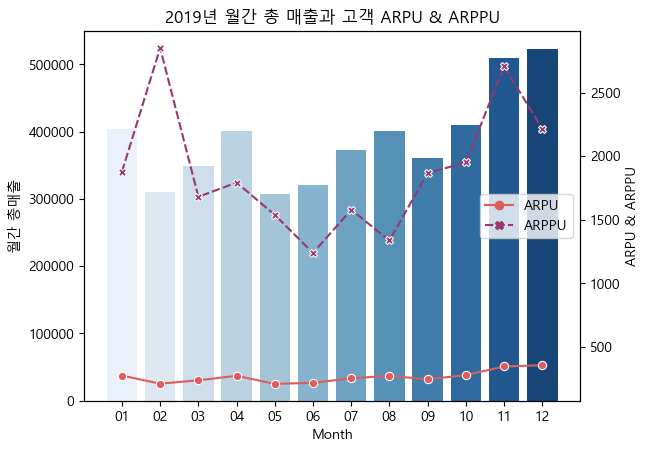

In [11]:
y0 = sns.barplot(data=sales_per_customer.iloc[-1:, :-1], palette='Blues')
y0.set_ylabel('월간 총매출')

y1 = y0.twinx()
y1 = sns.lineplot(arpu_df.T[:-1], palette='flare', markers=True)
y1.set_ylabel('ARPU & ARPPU')

# sns.lineplot()   #온라인 마케팅 비용
# sns.lineplot()   #오프라인 마케팅 비용
# sns.lineplot()   #쿠폰 사용 비율

plt.title('2019년 월간 총 매출과 고객 ARPU & ARPPU')
plt.show()

- 월간 ARPU로는 월간 매출과의 연관성을 찾기 어려움
- 월간 ARPPU와 월간 매출과의 연관성은 2월을 제외하면 영향이 있는 것으로 보임
- 총 인원 대비 주로 구매를 많이 하는 고객층이 존재하는 것으로 보임

---

In [12]:
sql_query = '''
SELECT MID(Date, 6, 2) Month, SUM(OfflineCost) OfflineCost, SUM(OnlineCost) OnlineCost
FROM marketing
GROUP BY Month
ORDER BY Month
'''

def execute_sql(sql_query):
    cur.execute(sql_query)
    tmp_result = cur.fetchall()
    col = [i[0] for i in cur.description]
    tmp_df = pd.DataFrame(tmp_result, columns = col)
    return tmp_df

monthly_marketing = execute_sql(sql_query)
monthly_marketing.set_index('Month', drop=True, inplace=True)
monthly_marketing

,OfflineCost,OnlineCost
Month,,
01,96600.00,58328.95
02,81300.00,55807.92
03,73500.00,48750.09
04,96000.00,61026.83
05,65500.00,52759.64
06,80500.00,53818.14
07,67500.00,52717.85
08,85500.00,57404.15
09,83000.00,52514.54


In [13]:
monthly_df = pd.concat([arpu_df, monthly_marketing.T], axis=0)
monthly_df['Avg'] = [round(r.mean(), 2) for i, r in monthly_df.iterrows()]
monthly_df

Month,01,02,03,04,05,06,07,08,09,10,11,12,Avg
ARPU,274.95,211.73,238.15,273.58,209.65,218.72,253.84,273.3,245.61,279.07,346.69,356.44,265.14
ARPPU,1877.32,2851.56,1680.81,1792.94,1538.82,1239.7,1578.97,1337.37,1868.13,1950.86,2707.14,2217.2,1886.74
OfflineCost,96600.00,81300.00,73500.00,96000.00,65500.00,80500.00,67500.00,85500.00,83000.00,93500.00,93000.00,122000.00,86491.67
OnlineCost,58328.95,55807.92,48750.09,61026.83,52759.64,53818.14,52717.85,57404.15,52514.54,57724.65,68144.96,76648.75,57970.54


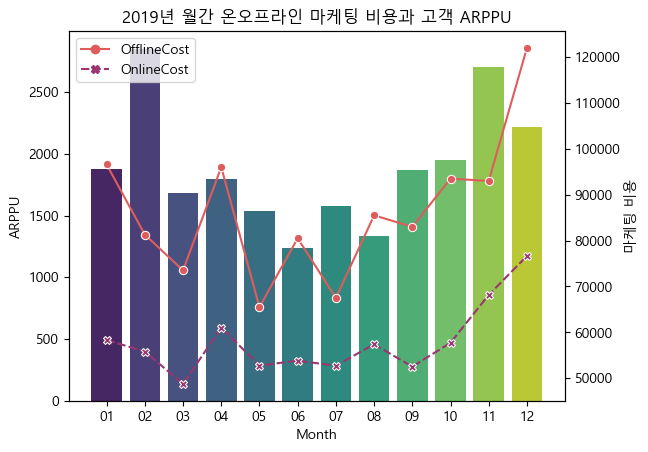

In [15]:
y0 = sns.barplot(monthly_df.loc[['ARPPU']].drop('Avg', axis=1), palette='viridis')
y0.set_ylabel('ARPPU')

y1 = y0.twinx()
y1 = sns.lineplot(monthly_df.loc['OfflineCost':'OnlineCost'].T[:-1], palette='flare', markers=True)
y1.set_ylabel('마케팅 비용')

# sns.lineplot()   #쿠폰 사용 비율
plt.title('2019년 월간 온오프라인 마케팅 비용과 고객 ARPPU')
plt.show()

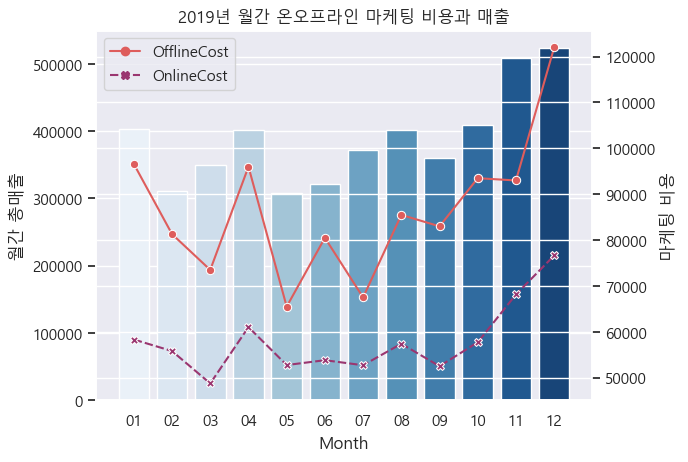

In [90]:
y0 = sns.barplot(data=sales_per_customer.iloc[-1:, :-1], palette='Blues')
y0.set_ylabel('월간 총매출')

y1 = y0.twinx()
y1 = sns.lineplot(monthly_df.loc['OfflineCost':'OnlineCost'].T[:-1], palette='flare', markers=True)
y1.set_ylabel('마케팅 비용')

plt.title('2019년 월간 온오프라인 마케팅 비용과 매출')
plt.show()

- 온라인/오프라인 마케팅 비용의 효과는 매출과 연관성이 있는 것으로 보임
- 하지만 ARPPU과의 연관성은 조금 더 따져볼 필요가 있음

---

In [60]:
# 미사용
# y0 = sns.lineplot(monthly_df.loc[['ARPPU']].T[:-1], palette='flare', markers=True)
# y0.set_ylabel('ARPPU')

# y1 = y0.twinx()
# y1 = sns.barplot(monthly_df.loc['OfflineCost':'OnlineCost'].drop('Avg', axis=1).stack(), x='Month', palette='flare', hue='index')
# y1.set_ylabel('마케팅 비용')

# # # sns.lineplot()   #쿠폰 사용 비율
# plt.title('2019년 월간 온오프라인 마케팅 비용과 고객 ARPPU')
# plt.show()

In [72]:
import copy
tmp_df = sales_df.copy()
tmp_df['Count'] = [1] * len(sales_df)
coupon_ratio = tmp_df.pivot_table(index='CouponStatus', columns='Month', values='Count', aggfunc=np.sum, margins=True, margins_name='Total Count')
coupon_ratio

Month,01,02,03,04,05,06,07,08,09,10,11,12,Total Count
CouponStatus,,,,,,,,,,,,,
Clicked,2075,1675,2183,2114,2376,2106,2705,3109,2143,2119,2014,2307,26926
Not Used,605,511,687,606,704,668,789,948,655,635,583,703,8094
Used,1383,1098,1476,1430,1492,1419,1757,2093,1490,1410,1364,1492,17904
Total Count,4063,3284,4346,4150,4572,4193,5251,6150,4288,4164,3961,4502,52924


In [74]:
for i in coupon_ratio.index:
    for c in coupon_ratio.columns:
        tmp_ratio = round(coupon_ratio.loc[i, c] / coupon_ratio.loc['Total Count', c], 2)
        coupon_ratio.loc[i, c] = tmp_ratio
        
coupon_ratio

Month,01,02,03,04,05,06,07,08,09,10,11,12,Total Count
CouponStatus,,,,,,,,,,,,,
Clicked,0.51,0.51,0.50,0.51,0.52,0.50,0.52,0.51,0.50,0.51,0.51,0.51,0.51
Not Used,0.15,0.16,0.16,0.15,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.16,0.15
Used,0.34,0.33,0.34,0.34,0.33,0.34,0.33,0.34,0.35,0.34,0.34,0.33,0.34
Total Count,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current 

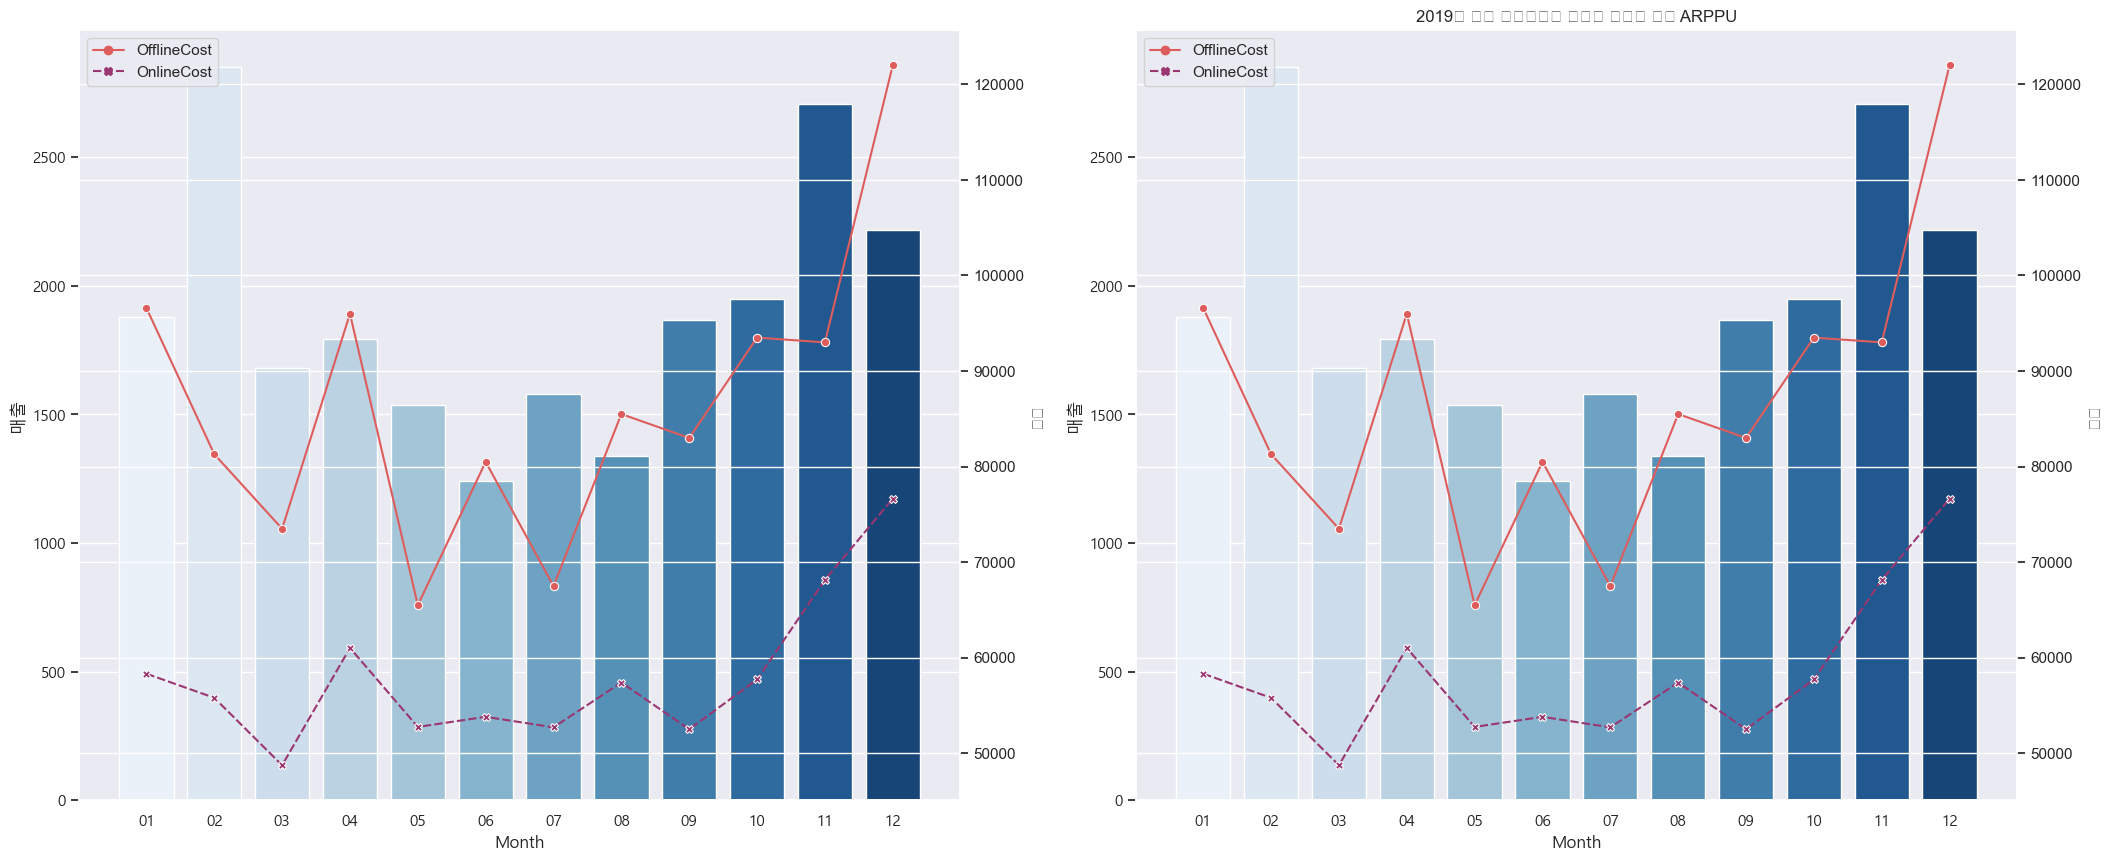

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.set(style = 'darkgrid')
#------------------------------------------------------------------------------
ax01 = sns.barplot(monthly_df.loc[['ARPPU']].drop('Avg', axis=1), ax=axes[0], palette='Blues')
ax01.set_ylabel('매출')

ax02 = ax01.twinx()
ax02 = sns.lineplot(monthly_df.loc['OfflineCost':'OnlineCost'].T[:-1], palette='flare', markers=True)
ax02.set_ylabel('비용')
#------------------------------------------------------------------------------
ax11 = sns.barplot(monthly_df.loc[['ARPPU']].drop('Avg', axis=1), ax=axes[1], palette='Blues')
ax11.set_ylabel('매출')

ax12 = ax11.twinx()
ax12 = sns.lineplot(monthly_df.loc['OfflineCost':'OnlineCost'].T[:-1], palette='flare', markers=True)
ax12.set_ylabel('비용')

# # sns.lineplot()   #쿠폰 사용 비율
plt.title('2019년 월간 온오프라인 마케팅 비용과 고객 ARPPU')
plt.show()